In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
boston.data
boston.target
boston.feature_names
# boston.DESCR

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
bostonDF.shape

(506, 14)

Q. 보스톤 주택가격 데이터로 다음을 수행하시고 모델에서 가장 중요한 변수 및 분석에 필요한 인사이트 를 기술하세요.

- 가격과 각 변수들간의 산점도 및 선형 회귀직선을 시각화하여 탐색한다.
- 독립변수간의 상관관계를 히트맵을 이용하여 탐색한다.
- 종속변수와 각 독립변수간 상관관계를 탐색한다.

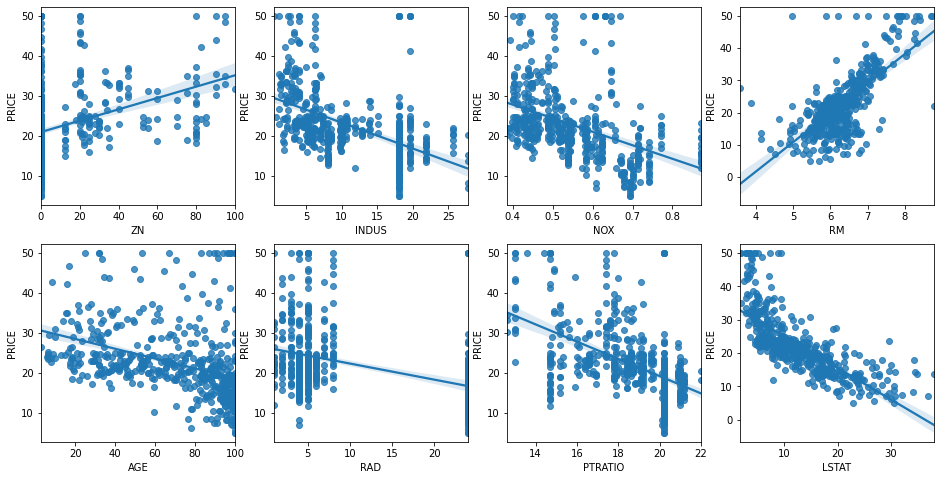

In [13]:
fig, axs = plt.subplots(ncols=4,nrows=2,figsize=(16,8))
lm_features = [ 'ZN', 'INDUS', 'NOX', 'RM', 'AGE','RAD','PTRATIO','LSTAT']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

Text(0.5, 1.0, 'Heatmap of the Dataset')

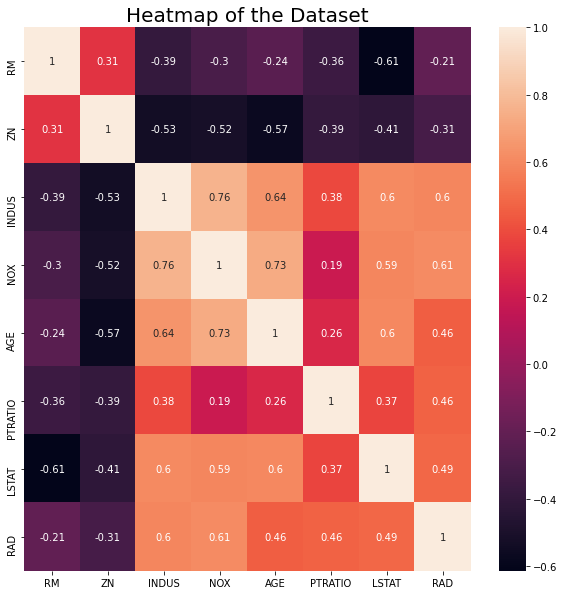

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(bostonDF[['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']].corr(),annot=True)
plt.title('Heatmap of the Dataset',fontsize=20)

Text(0.5, 1.0, 'Heatmap of the Dataset')

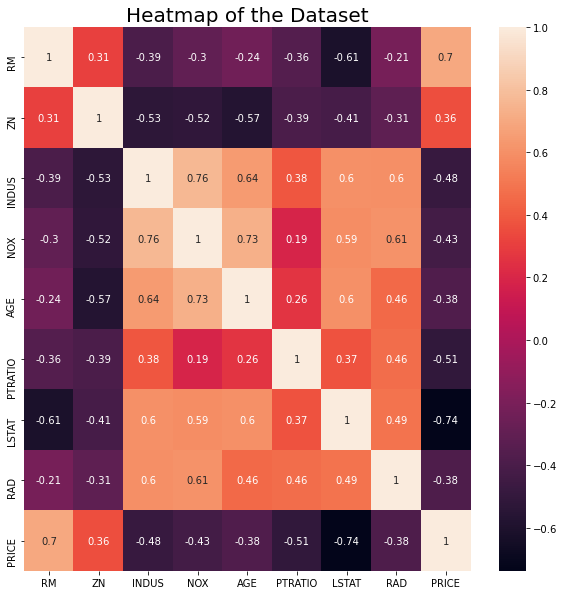

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(bostonDF[['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD','PRICE']].corr(),annot=True)
plt.title('Heatmap of the Dataset',fontsize=20)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757
